Batch analysis of current
Hákon Örn Árnason 02.09.20

In [8]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import os.path as path
from scipy.constants import pi, e, hbar, m_e, epsilon_0
from pathlib import Path
filepath = Path('/home/hakon/Documents/Code/Vacuum-MD/data/') # Insert the path to data folder
#filepath = Path('/home/hakon/Documents/PE Simulations/June21/') # Insert the path to data folder

In [9]:
# text_file = open("/home/hakon/Documents/Code/Vacuum-MD/data/laser", "r")
# lines = text_file.read()
# print(lines)
# text_file.close()
pulse_amplitude = []
pulse_width = []
for name in filepath.glob('*/laser'):
    with open(name) as f:
        w, h = [float(x) for x in next(f).split()]
        array = [[float(x) for x in line.split()] for line in f]
        pulse_amplitude.append(array[4][0])
        pulse_width.append(array[3][0])
#print(pulse_amplitude)
#print(pulse_width)
#print(array[3][0])
#print(array[4][0])

KeyboardInterrupt: 

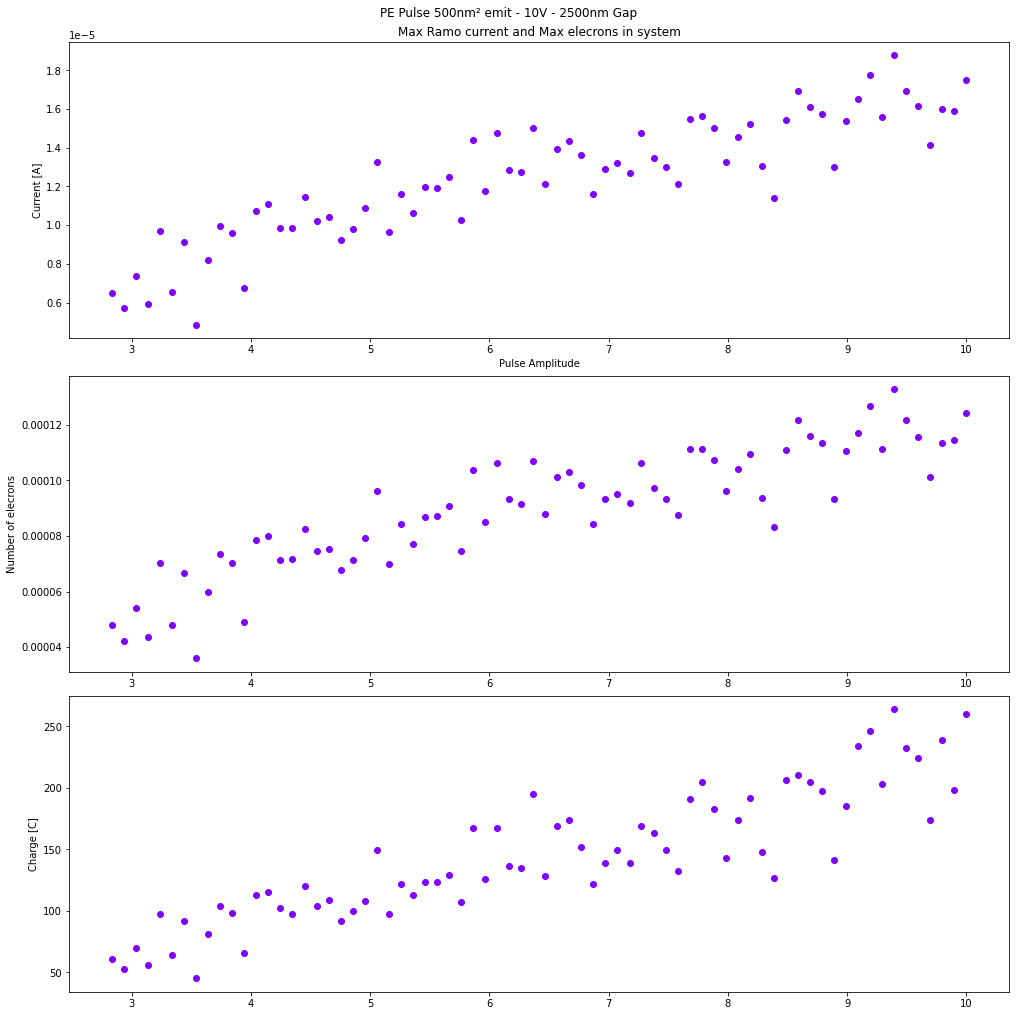

In [10]:
fig, axs = plt.subplots(3, 1, constrained_layout=True, figsize=(14, 14)) #sharex=True,
fig.suptitle('PE Pulse 500nm² emit - 10V - 2500nm Gap')
#axs[0].set_title('Nr Elec in System')
#axs[0].set_ylabel('Nr Electrons')
#axs[1].set_title('Ramo')
#axs[1].set_ylabel('Current [A]')
axs[0].set_title('Max Ramo current and Max elecrons in system')
axs[0].set_ylabel('Current [A]')
axs[0].set_xlabel('Pulse Amplitude')
axs[1].set_ylabel('Number of elecrons')
axs[2].set_ylabel('Charge [C]')
filepath = ['/home/hakon/Documents/PE Simulations/Aug10/10sigma/'  , \
            '/home/hakon/Documents/PE Simulations/Aug10/50sigma/'  , \
            '/home/hakon/Documents/PE Simulations/Aug10/100sigma/' , \
            '/home/hakon/Documents/PE Simulations/Aug10/500sigma/' , \
            '/home/hakon/Documents/PE Simulations/Aug10/1000sigma/', \
            '/home/hakon/Documents/PE Simulations/Aug10/2000sigma/' ]
            #'/home/hakon/Documents/PE Simulations/Aug10/6000sigma/' ]
            #'/home/hakon/Documents/PE Simulations/Aug10/3000sigma/'  ]

nrof = len(filepath)
color = iter(plt.cm.rainbow(np.linspace(0, 1, nrof)))

for i in range(nrof):
    path = Path(filepath[i])
    pulse_amplitude = []
    pulse_width = []
    count = 0
    c = next(color)
    
    for name in path.glob('*/laser'):
        with open(name) as f:
            w, h = [float(x) for x in next(f).split()]
            array = [[float(x) for x in line.split()] for line in f]
            pulse_amplitude.append(array[4][0])
            pulse_width.append(array[3][0])
    for name in path.glob('*/out/ramo_current.dt'):
        # Loading in one batch of sim.
        data = np.loadtxt(name)
        cur_time = data[:, 0]
        ramo_cur = data[:, 2]
        charge = ramo_cur*cur_time
        charge_max = np.amax(charge)
        nrElec = data[:, 5]
        elec_max = np.amax(nrElec)
        cur_max = np.amax(ramo_cur)
        #axs[0].plot(cur_time, nrElec)
        #axs[1].plot(cur_time, ramo_cur)
        axs[0].plot(pulse_amplitude[count],cur_max, "o", c=c)
        axs[2].plot(pulse_amplitude[count],elec_max, "o",  c=c)
        axs[1].plot(pulse_amplitude[count],charge_max, "o",  c=c)
        count += 1


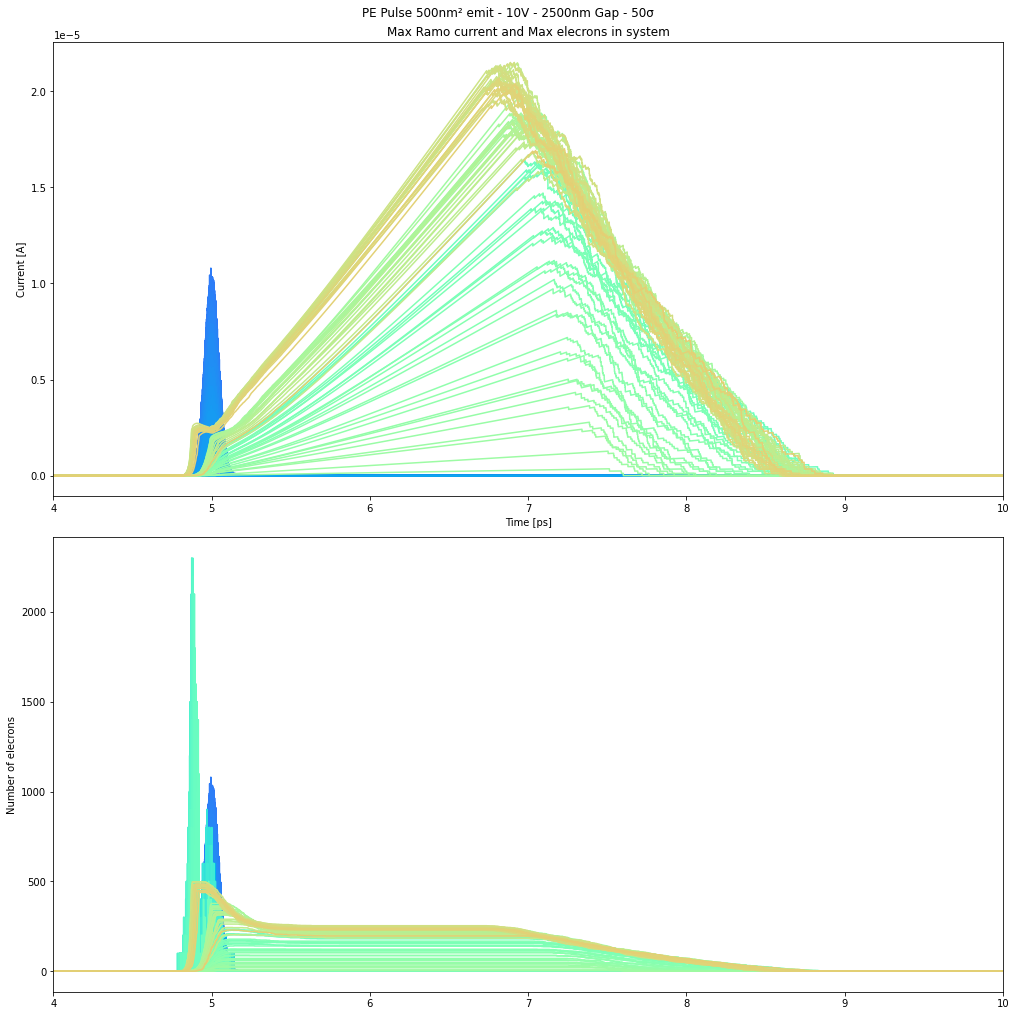

In [ ]:
fig, axs = plt.subplots(2, 1, constrained_layout=True, figsize=(14, 14)) #sharex=True,
fig.suptitle('PE Pulse 500nm² emit - 10V - 2500nm Gap - 50σ')
#axs[0].set_title('Nr Elec in System')
#axs[0].set_ylabel('Nr Electrons')
#axs[1].set_title('Ramo')
#axs[1].set_ylabel('Current [A]')
axs[0].set_title('Max Ramo current and Max elecrons in system')
axs[0].set_ylabel('Current [A]')
axs[0].set_xlabel('Time [ps]')
axs[1].set_ylabel('Number of elecrons')
axs[0].set(xlim=(4, 10))#, ylim=(ymin, ymax))
axs[1].set(xlim=(4, 10))#, ylim=(ymin, ymax))
filepath = ['/home/hakon/Documents/PE Simulations/Aug10/100sigma/']#  , \
#             '/home/hakon/Documents/PE Simulations/Aug10/50sigma/'  , \
#             '/home/hakon/Documents/PE Simulations/Aug10/100sigma/' , \
#             '/home/hakon/Documents/PE Simulations/Aug10/500sigma/' , \
#             '/home/hakon/Documents/PE Simulations/Aug10/1000sigma/', \
#             '/home/hakon/Documents/PE Simulations/Aug10/2000sigma/', \
#             '/home/hakon/Documents/PE Simulations/Aug10/6000sigma/', \
#             '/home/hakon/Documents/PE Simulations/Aug10/3000sigma/'  ]
path = Path(filepath[0])
color = iter(plt.cm.rainbow(np.linspace(0, 1, 300)))

for name in path.glob('*/out/emitted.dt'):
    # Loading in one batch of sim.
    data = np.loadtxt(name)
    emit_time    = data[:, 0]
    emit_pulse   = data[:, 6]
    emit_pulse_ref = emit_pulse / 100000000
    axs[0].plot(emit_time,emit_pulse_ref, c=c)
    axs[1].plot(emit_time,emit_pulse, c=c)
    c = next(color)

for name in path.glob('*/out/emitted.dt'):
    # Loading in one batch of sim.
    data = np.loadtxt(name)
    emit_time    = data[:, 0]
    emit_elec    = data[:, 2]
    emit_elec_ref = emit_elec *100
    axs[1].plot(emit_time,emit_elec_ref, c=c)
    c = next(color)

for name in path.glob('*/out/ramo_current.dt'):
    # Loading in one batch of sim.
    data = np.loadtxt(name)
    cur_time = data[:, 0]
    ramo_cur = data[:, 2]
    nrElec = data[:, 5]
    #elec_max = np.amax(nrElec)
    #cur_max = np.amax(ramo_cur)
    #axs[0].plot(cur_time, nrElec)
    #axs[1].plot(cur_time, ramo_cur)
    axs[0].plot(cur_time,ramo_cur, c=c)
    axs[1].plot(cur_time,nrElec, c=c)
    c = next(color)

In [ ]:
# # Loading in one batch of sim.
# filepath = '/home/hakon/Desktop/PE Simulations/100A 10V ImgOn/data/out'
# filename_ramo = path.join(filepath, 'ramo_current.dt') # Ramo current
# data = np.loadtxt(filename_ramo)
# cur_time1 = data[:, 0]
# ramo_cur1 = data[:, 2]
# nrElec1 = data[:, 5]

In [ ]:
# Loading in one batch of sim.
filepath = '/home/hakon/Desktop/PE Simulations/100A 10V ImgOn/data/out'
filename_emission = path.join(filepath, 'emitted.dt') # Emitted Electrons
data = np.loadtxt(filename_emission)
emit_time1 = data[:, 0]
emit_elec1 = data[:, 2]
emit_total1 = data[:, 3]
emit_pulse1 = data[:, 6]

OSError: /home/hakon/Desktop/PE Simulations/100A 10V ImgOn/data/out/emitted.dt not found.

In [ ]:
# Loading in one batch of sim.
filepath = '/home/hakon/Desktop/PE Simulations/100A 10V ImgOn/data/out'
filename_absorbed = path.join(filepath, 'absorbed.dt') # Absorbed Electrons
data = np.loadtxt(filename_absorbed)
absor_time2 = data[:, 0]
absor_elec2 = data[:, 2]

In [ ]:
center_sec = ramo_cur_sec_6 + ramo_cur_sec_7 + ramo_cur_sec_10 + ramo_cur_sec_11
outside_sec = ramo_cur_sec_1 + ramo_cur_sec_2 + ramo_cur_sec_3 + ramo_cur_sec_4 \
            + ramo_cur_sec_5 + ramo_cur_sec_8 + ramo_cur_sec_9 + ramo_cur_sec_12 \
            + ramo_cur_sec_13 + ramo_cur_sec_14 + ramo_cur_sec_15 + ramo_cur_sec_16

NameError: name 'ramo_cur_sec_6' is not defined

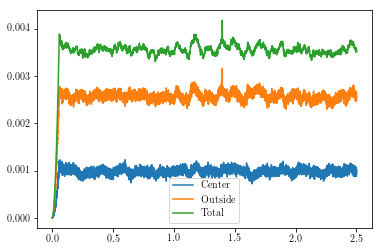

In [ ]:
plt.plot(cur_time, center_sec, \
         cur_time, outside_sec, \
         cur_time, ramo_cur)
plt.legend(['Center', 'Outside', 'Total'])

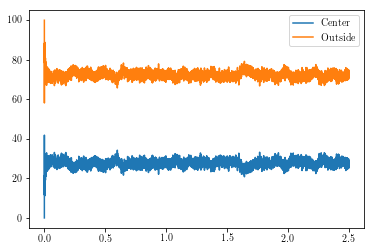

In [ ]:
center_per = center_sec/ramo_cur
outside_per = outside_sec/ramo_cur
plt.plot(cur_time, center_per*100, \
         cur_time, outside_per*100)
plt.legend(['Center', 'Outside'])

In [ ]:
center_mean = np.mean(center_per)
outside_mean = np.mean(outside_per)
print(center_mean*100)
print(outside_mean*100)
print((center_mean + outside_mean)*100)

27.6541146375079
72.34609217872617
100.00020681623407


In [ ]:
a_FN = e**2/(16.0*pi**2*hbar) # A eV V^{-2}
b_FN = -4.0/(3.0*hbar) * np.sqrt(2.0*m_e*e) # eV^{-3/2} V m^{-1}
l_const = e / (4.0*pi*epsilon_0) # eV^{2} V^{-1} m

In [ ]:
w_theta = 4.65 # work function in eV
time_step = 0.25E-15 # Time step in sec

V = 20.0E3 # Voltage
d = 2500.0E-9 # Gap spacing
L = 100.0E-9 #Side length of emitter

F = V/d # Electric Field
#A = L**2 # Area of emitter

In [ ]:
def t_y(F, w_theta_xy):
    l = l_const * (+1.0*F) / w_theta_xy**2 # l = y^2, y = 3.79E-4 * sqrt(F_old) / w_theta
    t_y = 1.0 + l*( 1.0/9.0 - 1.0/18.0*np.log(l) )
    return t_y

def v_y(F, w_theta_xy):
    l = l_const * (+1.0*F) / w_theta_xy**2 # l = y^2, y = 3.79E-4 * sqrt(F_old) / w_theta
    v_y = 1.0 - l + 1.0/6.0 * l * np.log(l)
    return v_y

def FN_current(A_in, w_theta_xy, F):
    J = a_FN/(w_theta_xy*t_y(F, w_theta_xy)**2)*F**2 * np.exp(v_y(F, w_theta_xy)*b_FN*w_theta_xy**(3/2)/F)
    I = A_in*J
    return I

In [ ]:
A_0 = 25.0E-9*25.0E-9
I_cen = FN_current(4*A_0, 4.65, F)
I_out = FN_current(12*A_0, 4.70, F)
I_tot = I_cen + I_out
print(I_cen)
print(I_out)
print(I_tot)

0.0013490933153878734
0.0034559137678192094
0.004805007083207083


In [ ]:
I_cen_per = I_cen/I_tot
I_out_per = I_out/I_tot
print(I_cen_per*100.0)
print(I_out_per*100.0)

28.076822614950785
71.92317738504921


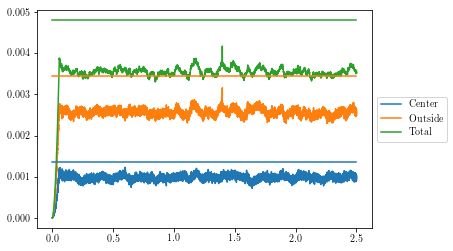

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(cur_time, center_sec, label='Center', color='#1f77b4')
ax.plot(cur_time, outside_sec, label='Outside', color='#ff7f0e')
ax.plot(cur_time, ramo_cur, label='Total', color='#2ca02c')
ax.plot([x_min, x_max], [I_cen, I_cen], color='#1f77b4')
ax.plot([x_min, x_max], [I_out, I_out], color='#ff7f0e')
ax.plot([x_min, x_max], [I_tot, I_tot], color='#2ca02c')
plt.legend(loc='center left', ncol=1, bbox_to_anchor=(1.0, 0.5))

Text(0, 0.5, '$I/I_{tot}$')

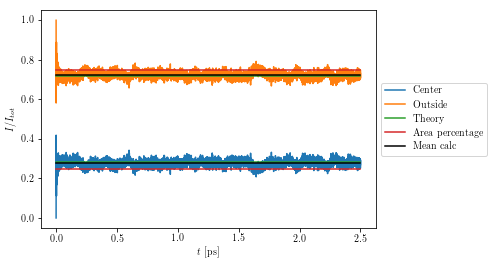

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(cur_time, center_per, label='Center', color='#1f77b4')
ax.plot(cur_time, outside_per, label='Outside', color='#ff7f0e')
ax.plot([x_min, x_max], [I_cen_per, I_cen_per], color='#2ca02c')
ax.plot([x_min, x_max], [I_out_per, I_out_per], color='#2ca02c', label='Theory')
ax.plot([x_min, x_max], [0.25, 0.25], color='#d62728')
ax.plot([x_min, x_max], [0.75, 0.75], color='#d62728', label='Area percentage')
ax.plot([x_min, x_max], [center_mean, center_mean], color='black')
ax.plot([x_min, x_max], [outside_mean, outside_mean], color='black', label='Mean calc')
plt.legend(loc='center left', ncol=1, bbox_to_anchor=(1.0, 0.5))
plt.xlabel(r'$t$ [ps]')
plt.ylabel(r'$I/I_{tot}$')

In [ ]:
filepath = '/home/kristor/Work/Vacuum-MD/data/Checkerboard/50nm_X_50nm/4.65-100/out/'
filename_ramo = path.join(filepath, 'ramo_current.dt') # Ramo current
data = np.loadtxt(filename_ramo)
#cur_time, step, ramo_cur, V_d, nrPart, nrElec, nrHole, ((ramo_current_emit(j,i)/cur_scale, j=1, MAX_SECTIONS), i = 1, nrEmit)
cur_time_50 = data[:, 0]
ramo_cur_50 = data[:, 2]

filepath = '/home/kristor/Work/Vacuum-MD/data/Checkerboard/86.60nm_X_86.60nm/4.70-100/out/'
filename_ramo = path.join(filepath, 'ramo_current.dt') # Ramo current
data = np.loadtxt(filename_ramo)
#cur_time, step, ramo_cur, V_d, nrPart, nrElec, nrHole, ((ramo_current_emit(j,i)/cur_scale, j=1, MAX_SECTIONS), i = 1, nrEmit)
cur_time_86 = data[:, 0]
ramo_cur_86 = data[:, 2]

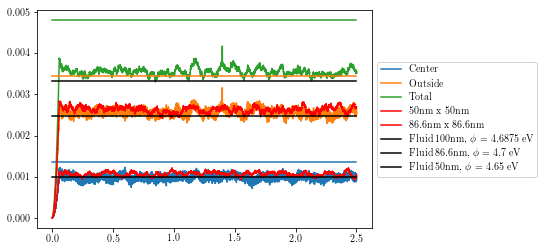

In [ ]:
I_fluid_100 = 3.33890157e+11*(100.0E-9)**2
I_fluid_86 = 3.30211120e+11*(86.6025E-9)**2
I_fluid_50 = 3.9934936e+11*(50.0E-9)**2

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(cur_time, center_sec, label='Center', color='#1f77b4')
ax.plot(cur_time, outside_sec, label='Outside', color='#ff7f0e')
ax.plot(cur_time, ramo_cur, label='Total', color='#2ca02c')
ax.plot([x_min, x_max], [I_cen, I_cen], color='#1f77b4')
ax.plot([x_min, x_max], [I_out, I_out], color='#ff7f0e')
ax.plot([x_min, x_max], [I_tot, I_tot], color='#2ca02c')
ax.plot(cur_time_50, ramo_cur_50, label='50nm x 50nm', color='red')
ax.plot(cur_time_86, ramo_cur_86, label='86.6nm x 86.6nm', color='red')
ax.plot([x_min, x_max], [I_fluid_100, I_fluid_100], label='Fluid 100nm, $\phi$ = 4.6875 eV', color='black')
ax.plot([x_min, x_max], [I_fluid_86, I_fluid_86], label='Fluid 86.6nm, $\phi$ = 4.7 eV', color='black')
ax.plot([x_min, x_max], [I_fluid_50, I_fluid_50], label='Fluid 50nm, $\phi$ = 4.65 eV', color='black')
plt.legend(loc='center left', ncol=1, bbox_to_anchor=(1.0, 0.5))